In [6]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from textblob import TextBlob

df = pd.read_parquet("data/city_wikivoyage_articles_cleaned.parquet")
df

,city,wikivoyage_article,has_get_around_by_car_section,section_text,article_status,section_word_count,polarity,subjectivity,date_retrieved,country,wiki_article,subregion
0,London,https://en.wikivoyage.org/wiki/London,True,Londoners who drive will normally take public ...,Guide,4144,0,0,2025-04-22 09:59:39.467567,United Kingdom,https://en.wikipedia.org/wiki/London,None
1,Hong Kong,https://en.wikivoyage.org/wiki/Hong_Kong,True,Traffic in Hong Kong moves on the left (the st...,Guide,623,0,0,2025-04-22 09:59:48.793564,Hong Kong,https://en.wikipedia.org/wiki/Hong_Kong,None
2,Beijing,https://en.wikivoyage.org/wiki/Beijing,True,Driving in Beijing can be quite complicated wi...,Usable,2166,0,0,2025-04-22 09:59:52.550410,China,https://en.wikipedia.org/wiki/Beijing,None
3,Singapore,https://en.wikivoyage.org/wiki/Singapore,True,Car rental is not a popular option for visitor...,Star,4605,0,0,2025-04-22 09:59:56.561937,Singapore,https://en.wikipedia.org/wiki/Singapore,None
4,Shanghai,https://en.wikivoyage.org/wiki/Shanghai,True,Driving is definitely not recommended in Shang...,Usable,664,0,0,2025-04-22 10:00:00.304191,China,https://en.wikipedia.org/wiki/Shanghai,None
...,...,...,...,...,...,...,...,...,...,...,...,...
413,Aguascalientes,https://en.wikivoyage.org/wiki/Aguascalientes,True,Aguascalientes is very accessible by road so r...,Usable,345,0,0,2025-04-22 10:31:11.784888,Mexico,https://en.wikipedia.org/wiki/Aguascalientes_City,None
414,Kingston (Jamaica),https://en.wikivoyage.org/wiki/Kingston_(Jamaica),True,"With some practice, bravery, and chutzpah you ...",Guide,676,0,0,2025-04-22 10:31:17.615950,Jamaica,"https://en.wikipedia.org/wiki/Kingston,_Jamaica",Jamaica
415,León (Mexico),https://en.wikivoyage.org/wiki/Le%C3%B3n_(Mexico),False,,Usable,0,0,0,2025-04-22 10:31:23.326993,Mexico,"https://en.wikipedia.org/wiki/Le%C3%B3n,_Guana...",Guanajuato
416,Mérida (Mexico),https://en.wikivoyage.org/wiki/M%C3%A9rida_(Me...,False,,Guide,0,0,0,2025-04-22 10:31:29.791715,Mexico,"https://en.wikipedia.org/wiki/M%C3%A9rida,_Yuc...",Yucat%C3%A1n


In [7]:
df["has_get_around_by_car_section"].value_counts()

has_get_around_by_car_section
True     217
False    201
Name: count, dtype: int64

In [8]:
trues_only = df.loc[df["has_get_around_by_car_section"] == True]
trues_only

,city,wikivoyage_article,has_get_around_by_car_section,section_text,article_status,section_word_count,polarity,subjectivity,date_retrieved,country,wiki_article,subregion
0,London,https://en.wikivoyage.org/wiki/London,True,Londoners who drive will normally take public ...,Guide,4144,0,0,2025-04-22 09:59:39.467567,United Kingdom,https://en.wikipedia.org/wiki/London,None
1,Hong Kong,https://en.wikivoyage.org/wiki/Hong_Kong,True,Traffic in Hong Kong moves on the left (the st...,Guide,623,0,0,2025-04-22 09:59:48.793564,Hong Kong,https://en.wikipedia.org/wiki/Hong_Kong,None
2,Beijing,https://en.wikivoyage.org/wiki/Beijing,True,Driving in Beijing can be quite complicated wi...,Usable,2166,0,0,2025-04-22 09:59:52.550410,China,https://en.wikipedia.org/wiki/Beijing,None
3,Singapore,https://en.wikivoyage.org/wiki/Singapore,True,Car rental is not a popular option for visitor...,Star,4605,0,0,2025-04-22 09:59:56.561937,Singapore,https://en.wikipedia.org/wiki/Singapore,None
4,Shanghai,https://en.wikivoyage.org/wiki/Shanghai,True,Driving is definitely not recommended in Shang...,Usable,664,0,0,2025-04-22 10:00:00.304191,China,https://en.wikipedia.org/wiki/Shanghai,None
...,...,...,...,...,...,...,...,...,...,...,...,...
410,Łódź,https://en.wikivoyage.org/wiki/%C5%81%C3%B3d%C...,True,Driving in Łódź is quite easy and the rules of...,Guide,1508,0,0,2025-04-22 10:30:53.673694,Poland,https://en.wikipedia.org/wiki/%C5%81%C3%B3d%C5%BA,None
411,Portland (Oregon),https://en.wikivoyage.org/wiki/Portland_(Oregon),True,Driving around downtown is not recommended. In...,Guide,978,0,0,2025-04-22 10:31:00.062830,United States,"https://en.wikipedia.org/wiki/Portland,_Oregon",Oregon
413,Aguascalientes,https://en.wikivoyage.org/wiki/Aguascalientes,True,Aguascalientes is very accessible by road so r...,Usable,345,0,0,2025-04-22 10:31:11.784888,Mexico,https://en.wikipedia.org/wiki/Aguascalientes_City,None
414,Kingston (Jamaica),https://en.wikivoyage.org/wiki/Kingston_(Jamaica),True,"With some practice, bravery, and chutzpah you ...",Guide,676,0,0,2025-04-22 10:31:17.615950,Jamaica,"https://en.wikipedia.org/wiki/Kingston,_Jamaica",Jamaica


In [9]:
polarities = []
subjectivities = []

for text in trues_only["section_text"]:
    blob = TextBlob(text)
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

trues_only.loc[:, "polarity"] = polarities
trues_only.loc[:, "subjectivity"] = subjectivities

trues_only

C:\Users\Peti Vlaskovits\AppData\Local\Temp\ipykernel_15108\1877593161.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04477056277056277, -0.054464646464646466, 0.06507936507936507, 0.06407924107142857, 0.02433333333333334, 0.029487179487179487, 0.13112599206349207, 0.16488095238095238, 0.07688350340136053, 0.10715702947845805, 0.15761904761904763, -0.0043650793650793565, 0.13534798534798537, -0.07790178571428572, 0.09072667923474377, 0.09545454545454546, 0.08991336325105961, 0.11126940588147487, 0.1451590076590077, 0.10986024844720498, 0.020000000000000004, 0.06389751552795031, 0.06145833333333334, 0.17307692307692307, 0.020090638528138523, 0.06345029239766084, 0.01835775335775336, 0.10371087246087246, 0.1281580687830688, 0.0, 0.11785714285714285, 0.1482843137254902, 0.006954887218045114, 0.08626068376068374, 0.11051329622758191, 0.3766025641025641, 0.05425, 0.04806547619047621, -0.07083333333333333, 0.0831

,city,wikivoyage_article,has_get_around_by_car_section,section_text,article_status,section_word_count,polarity,subjectivity,date_retrieved,country,wiki_article,subregion
0,London,https://en.wikivoyage.org/wiki/London,True,Londoners who drive will normally take public ...,Guide,4144,0.044771,0.442526,2025-04-22 09:59:39.467567,United Kingdom,https://en.wikipedia.org/wiki/London,None
1,Hong Kong,https://en.wikivoyage.org/wiki/Hong_Kong,True,Traffic in Hong Kong moves on the left (the st...,Guide,623,-0.054465,0.411414,2025-04-22 09:59:48.793564,Hong Kong,https://en.wikipedia.org/wiki/Hong_Kong,None
2,Beijing,https://en.wikivoyage.org/wiki/Beijing,True,Driving in Beijing can be quite complicated wi...,Usable,2166,0.065079,0.356019,2025-04-22 09:59:52.550410,China,https://en.wikipedia.org/wiki/Beijing,None
3,Singapore,https://en.wikivoyage.org/wiki/Singapore,True,Car rental is not a popular option for visitor...,Star,4605,0.064079,0.416290,2025-04-22 09:59:56.561937,Singapore,https://en.wikipedia.org/wiki/Singapore,None
4,Shanghai,https://en.wikivoyage.org/wiki/Shanghai,True,Driving is definitely not recommended in Shang...,Usable,664,0.024333,0.578667,2025-04-22 10:00:00.304191,China,https://en.wikipedia.org/wiki/Shanghai,None
...,...,...,...,...,...,...,...,...,...,...,...,...
410,Łódź,https://en.wikivoyage.org/wiki/%C5%81%C3%B3d%C...,True,Driving in Łódź is quite easy and the rules of...,Guide,1508,0.051028,0.340945,2025-04-22 10:30:53.673694,Poland,https://en.wikipedia.org/wiki/%C5%81%C3%B3d%C5%BA,None
411,Portland (Oregon),https://en.wikivoyage.org/wiki/Portland_(Oregon),True,Driving around downtown is not recommended. In...,Guide,978,-0.012745,0.410784,2025-04-22 10:31:00.062830,United States,"https://en.wikipedia.org/wiki/Portland,_Oregon",Oregon
413,Aguascalientes,https://en.wikivoyage.org/wiki/Aguascalientes,True,Aguascalientes is very accessible by road so r...,Usable,345,0.287500,0.467500,2025-04-22 10:31:11.784888,Mexico,https://en.wikipedia.org/wiki/Aguascalientes_City,None
414,Kingston (Jamaica),https://en.wikivoyage.org/wiki/Kingston_(Jamaica),True,"With some practice, bravery, and chutzpah you ...",Guide,676,0.256818,0.477273,2025-04-22 10:31:17.615950,Jamaica,"https://en.wikipedia.org/wiki/Kingston,_Jamaica",Jamaica


<Axes: xlabel='polarity'>

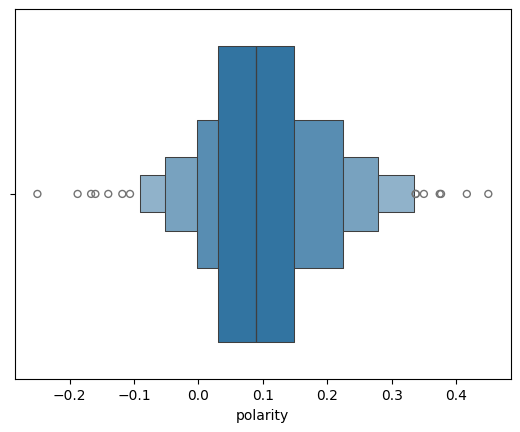

In [10]:
sns.boxenplot(x=trues_only["polarity"])

<Axes: xlabel='polarity', ylabel='Count'>

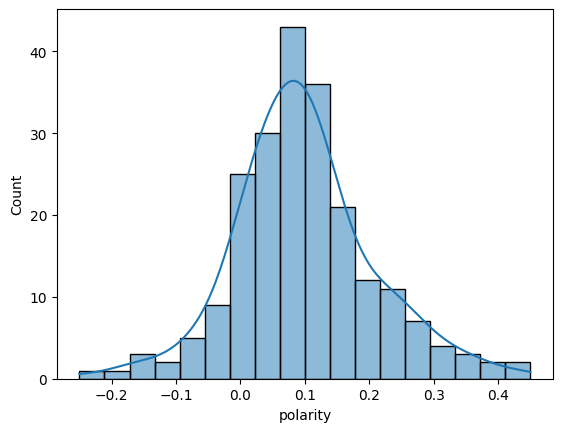

In [11]:
sns.histplot(trues_only["polarity"], kde=True)

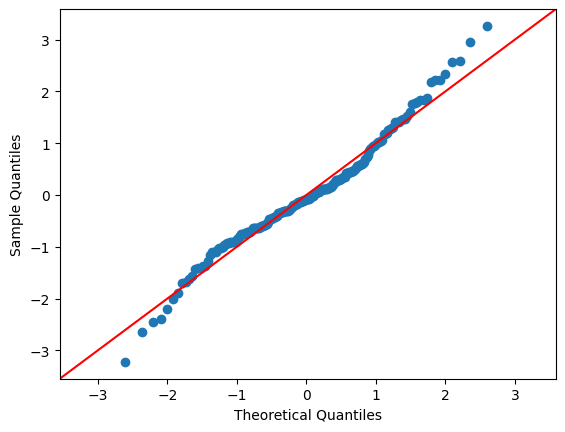

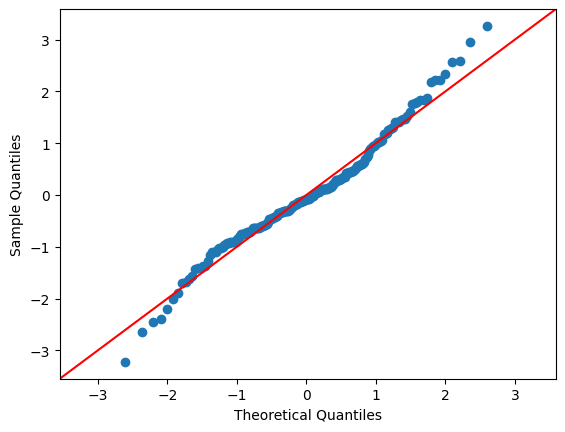

In [12]:
sm.qqplot(data=trues_only["polarity"], line='45', fit=True)

<Axes: xlabel='subjectivity'>

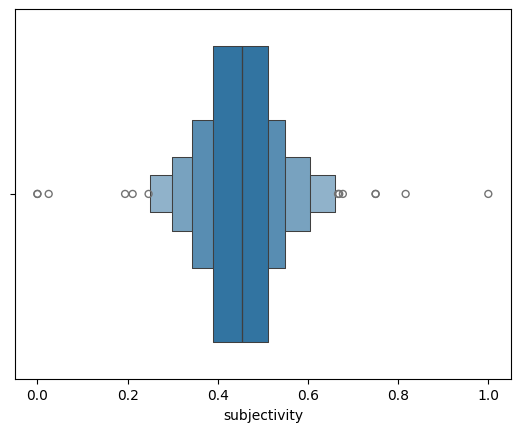

In [13]:
sns.boxenplot(x=trues_only["subjectivity"])

<Axes: xlabel='subjectivity', ylabel='Count'>

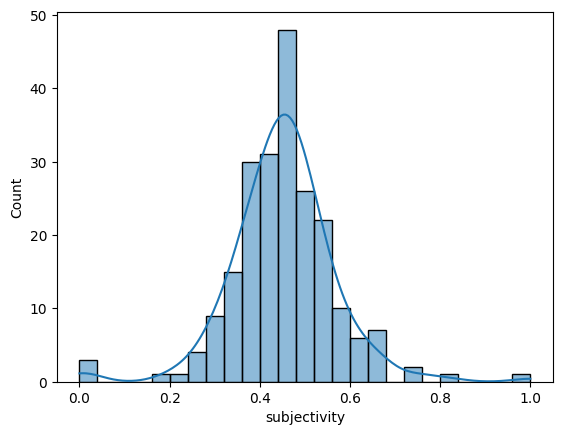

In [14]:
sns.histplot(trues_only["subjectivity"], kde=True)

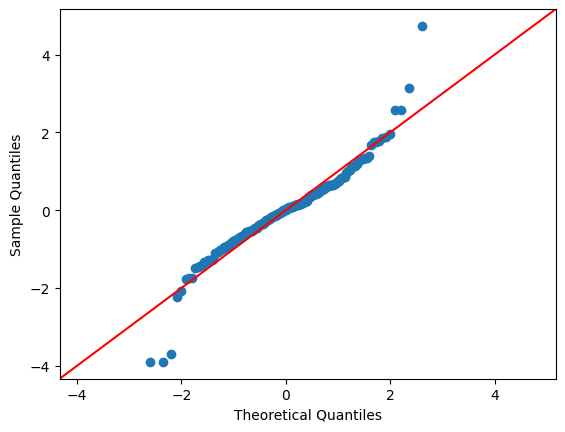

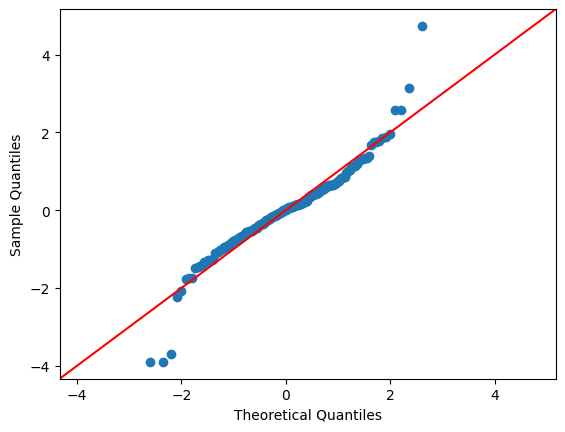

In [15]:
sm.qqplot(data=trues_only["subjectivity"], line='45', fit=True)

In [16]:
res = stats.anderson(trues_only["subjectivity"])
print(res.statistic)
print(res.significance_level)
print(res.critical_values)

2.555480574152739
[15.  10.   5.   2.5  1. ]
[0.566 0.644 0.773 0.902 1.073]


<Axes: xlabel='section_word_count'>

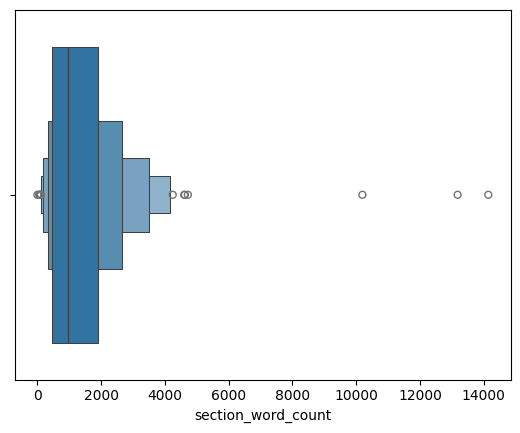

In [17]:
sns.boxenplot(x=trues_only["section_word_count"])

<Axes: xlabel='section_word_count', ylabel='Count'>

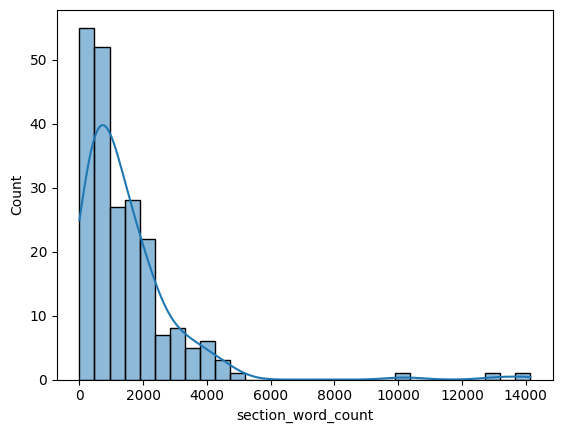

In [18]:
sns.histplot(trues_only["section_word_count"], kde=True)

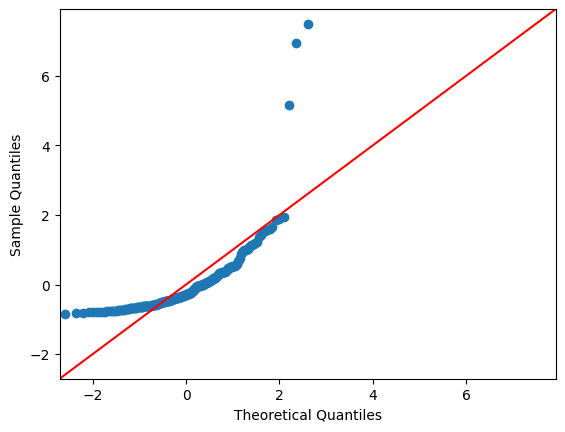

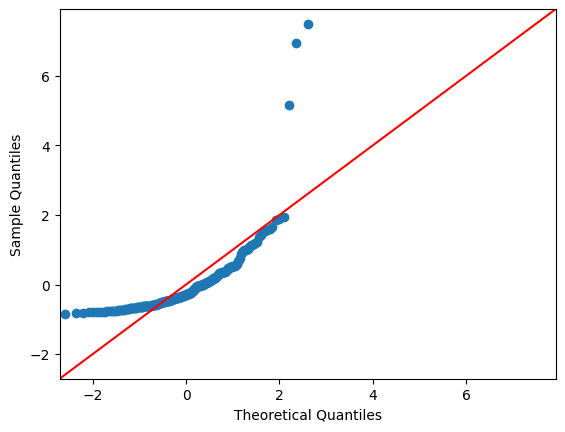

In [19]:
sm.qqplot(data=trues_only["section_word_count"], line='45', fit=True)